In [ ]:
# add parent dir to sys.path so we can import from repo base
import os; import sys; sys.path.append(os.path.dirname(os.path.realpath(os.getcwd())))

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tsfresh import extract_relevant_features

from script.dataset import get_data
from script.visualization import report_cm

In [ ]:
X, y = get_data()

In [4]:
features = extract_relevant_features(X, y, column_id='id', column_sort='time')
features

Feature Extraction: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:50<00:00,  2.01s/it]


,"EMG_2__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""mean""","EMG_2__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""max""","EMG_2__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""min""","EMG_2__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""max""","EMG_2__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""mean""","EMG_2__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""max""","EMG_2__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""mean""","EMG_2__linear_trend__attr_""intercept""","EMG_2__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""min""","EMG_2_cal__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""max""",...,EMG_4__time_reversal_asymmetry_statistic__lag_2,"EMG_5__fft_coefficient__attr_""abs""__coeff_19","EMG_5_cal__fft_coefficient__attr_""abs""__coeff_19","EMG_5_cal__fft_coefficient__attr_""abs""__coeff_17","EMG_5__fft_coefficient__attr_""abs""__coeff_17",EMG_6__variation_coefficient,"EMG_5_cal__fft_coefficient__attr_""abs""__coeff_76","EMG_5__fft_coefficient__attr_""abs""__coeff_76",EMG_2__permutation_entropy__dimension_5__tau_1,EMG_2_cal__permutation_entropy__dimension_5__tau_1
0529_jannis_1_1,671.552941,857.600000,610.292553,754.523333,678.241000,737.510638,678.635771,678.788980,575.213333,-175.153731,...,1.961590e+06,722.320516,722.320516,5330.899513,5330.899513,0.093951,601.034574,601.034574,4.151009,4.151009
0529_jannis_1_2,636.950222,825.400000,599.070588,749.313725,647.865196,690.778151,647.985770,649.693435,574.686275,-207.353731,...,9.967113e+04,2571.897045,2571.897045,2099.531526,2099.531526,0.093073,242.565281,242.565281,4.014761,4.014761
0529_jannis_1_3,1045.596000,1284.200000,978.324042,1188.108225,1061.259740,1140.515679,1063.832753,1065.200384,944.012987,251.446269,...,4.831842e+06,2085.852326,2085.852326,1064.125383,1064.125383,0.084211,161.139452,161.139452,4.181137,4.181137
0529_jannis_1_4,1057.212606,1264.000000,979.601064,1190.246667,1051.169222,1119.353723,1052.602128,1052.997139,920.046667,231.246269,...,-4.084258e+06,2297.260105,2297.260105,1579.495805,1579.495805,0.089517,754.203097,754.203097,4.210731,4.210731
0529_jannis_1_5,675.235026,887.619048,626.890909,775.198413,686.091071,748.028283,687.950887,688.599429,587.333333,-145.134684,...,7.561297e+05,3147.055517,3147.055517,1582.640160,1582.640160,0.131849,1561.605219,1561.605219,4.248345,4.248345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0613_nikolai_9_4,545.608000,807.200000,493.491289,639.623377,552.536364,610.564460,555.282230,558.340033,458.948052,525.870412,...,2.907790e+06,500.615326,500.615326,1219.010117,1219.010117,0.111461,87.828458,87.828458,4.200094,4.200094
0613_nikolai_9_5,334.999394,462.400000,309.223404,400.866667,341.398222,371.196809,340.152660,339.728953,284.870000,181.070412,...,-6.266072e+04,413.864258,413.864258,1729.704223,1729.704223,0.120316,1199.001589,1199.001589,4.049993,4.049993
0613_nikolai_9_6,244.850824,370.100000,201.068908,284.980392,235.683193,264.478992,235.194958,233.868263,180.254902,88.770412,...,-2.743582e+04,265.522925,265.522925,2561.335977,2561.335977,0.132711,133.747969,133.747969,4.061929,4.061929
0613_nikolai_9_7,427.536353,599.100000,367.270588,510.137255,415.400560,458.626891,412.771765,412.249145,309.078431,317.770412,...,3.137295e+04,167.515803,167.515803,347.589328,347.589328,0.344522,76.122444,76.122444,3.914136,3.914136


              precision    recall  f1-score   support

    crimp_20       0.81      0.69      0.75        36
    crimp_45       0.67      0.65      0.66        31
         jug       0.93      0.88      0.90        32
   sloper_30       0.68      0.88      0.77        26

    accuracy                           0.77       125
   macro avg       0.77      0.77      0.77       125
weighted avg       0.78      0.77      0.77       125



# Results

accuracy: 0.768


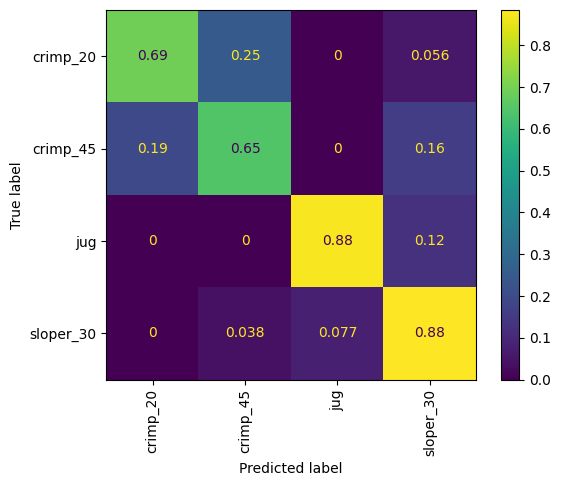

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=.4)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
report_cm('Results', y_test, y_pred, rf.classes_)

/var/folders/s8/g_638jvd1pq8yhzr9r71mx3c0000gn/T/ipykernel_18493/3507008035.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


Top 20 features
1.08%: EMG_7__absolute_maximum
0.81%: EMG_2_cal__agg_linear_trend__attr_"intercept"__chunk_len_5__f_agg_"max"
0.81%: EMG_7__quantile__q_0.7
0.58%: EMG_3__quantile__q_0.6
0.56%: EMG_3__quantile__q_0.3
0.53%: EMG_2_cal__maximum
0.52%: EMG_2_cal__c3__lag_1
0.49%: EMG_7__root_mean_square
0.47%: EMG_3__c3__lag_2
0.46%: EMG_2__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"min"
0.46%: EMG_6__quantile__q_0.7
0.44%: EMG_3__cwt_coefficients__coeff_8__w_10__widths_(2, 5, 10, 20)
0.43%: EMG_7__quantile__q_0.3
0.41%: EMG_2__quantile__q_0.3
0.40%: EMG_3__quantile__q_0.9
0.38%: EMG_7__benford_correlation
0.38%: EMG_3__cwt_coefficients__coeff_4__w_5__widths_(2, 5, 10, 20)
0.38%: EMG_3__quantile__q_0.1
0.38%: EMG_7__c3__lag_2
0.37%: EMG_2_cal__quantile__q_0.6


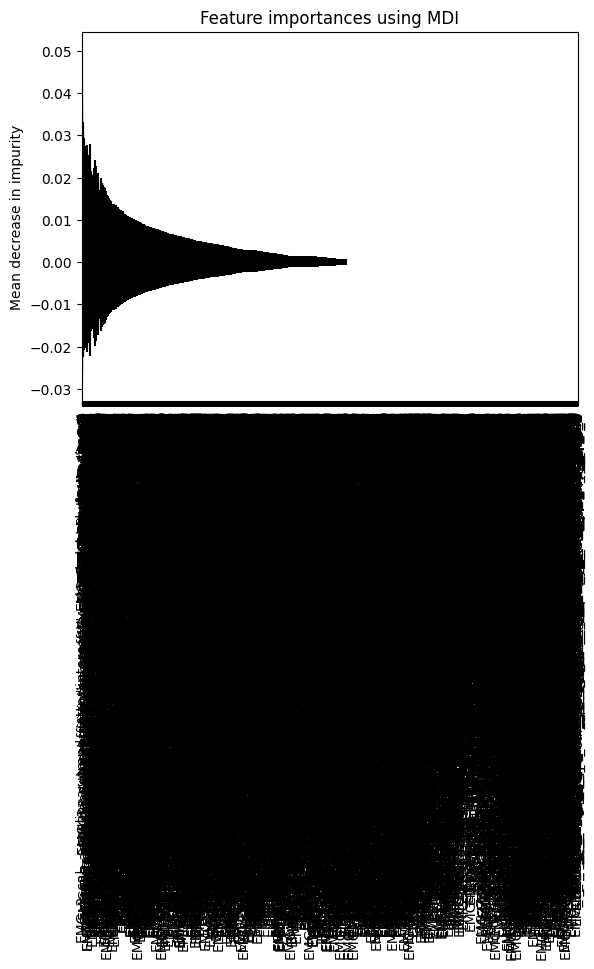

In [53]:
importances = rf.feature_importances_
feature_names = np.array(features.columns)
idx = importances.argsort()[::-1]

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances[idx], index=feature_names[idx])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std[idx], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

n_top_features = 20
print(f'Top {n_top_features} features')
for importance, feature in np.array(list(zip(importances[idx], feature_names[idx])))[:n_top_features]:
    print(f'{float(importance) * 100:.2f}%: {feature}')